Oasis

V.L.Swathika

Data science Internship

Task 4

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. 

It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

Aim is to build a prediction model that will accurately classify which texts are spam.

Kaggle : https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [164]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [165]:
df = pd.read_csv(r"C:\Users\HP\Downloads\archive\spam.csv", encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [166]:
ham=df[df['v1']=='ham']
first_row_of_ham = ham.iloc[0]
value_in_v2_column = first_row_of_ham['v2']
value_in_v2_column

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [167]:
spam=df[df['v1']=='spam']
first_row_of_spam = spam.iloc[0]
value_in_v2_column = first_row_of_spam['v2']
value_in_v2_column

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [168]:
df.shape

(5572, 5)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [170]:
df.describe(exclude=np.number)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [171]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [172]:
df.duplicated().sum()

403

In [173]:
df[df.duplicated]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
102,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
153,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
206,ham,"As I entered my cabin my PA said, '' Happy B'd...",NaN,NaN,NaN
222,ham,"Sorry, I'll call later",NaN,NaN,NaN
325,ham,No calls..messages..missed calls,NaN,NaN,NaN
...,...,...,...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...,NaN,NaN,NaN
5535,ham,"I know you are thinkin malaria. But relax, chi...",NaN,NaN,NaN
5539,ham,Just sleeping..and surfing,NaN,NaN,NaN
5553,ham,Hahaha..use your brain dear,NaN,NaN,NaN


In [174]:
df.isnull().sum()/len(df)
#dropping the unnamed:2,unnamed;3,unnamed:4 columns since they have more than 90% null values

v1            0.000000
v2            0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

In [175]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [176]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [177]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

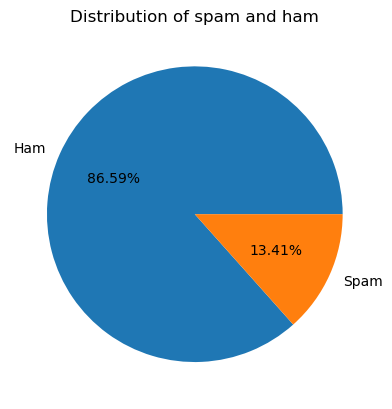

In [178]:
plt.pie(df['v1'].value_counts(),labels=['Ham','Spam'],autopct='%.2f%%')
plt.title('Distribution of spam and ham')
plt.show()

In [179]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['v1']=le.fit_transform(df['v1'])
df['v1']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int32

In [180]:
df['v1'].value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [181]:
df.columns=['Category','Message']
df.head(1)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."


In [182]:
from sklearn.model_selection import train_test_split
x=df['Message']
y=df['Category']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=10)

In [183]:
print('xtrain',xtrain.shape)
print('ytrain',ytrain.shape)
print('xtest',xtest.shape)
print('ytest',ytest.shape)

xtrain (3900,)
ytrain (3900,)
xtest (1672,)
ytest (1672,)


In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

xtrain_feature=feature_extraction.fit_transform(xtrain)
xtest_feature=feature_extraction.transform(xtest)

print('xtrain_feature')
print(xtrain_feature)
print('------------------------')
print('xtest_feature')
print(xtest_feature)

xtrain_feature
  (0, 854)	0.5016970086542163
  (0, 3797)	0.2626624828835249
  (0, 369)	0.41370667298917224
  (0, 6828)	0.37315672973926345
  (0, 2162)	0.43742686919673984
  (0, 1050)	0.30888659028178705
  (0, 3075)	0.28662900030567595
  (1, 1971)	0.4989248514357227
  (1, 2725)	0.4093828265288236
  (1, 3890)	0.3130107735951054
  (1, 1139)	0.38620925349314306
  (1, 2856)	0.27315627842982065
  (1, 5852)	0.284188912439452
  (1, 4265)	0.42540412749952006
  (2, 6881)	0.6729504060422761
  (2, 3835)	0.7396876036595016
  (3, 360)	0.3846654452456247
  (3, 4184)	0.41849014704923565
  (3, 3254)	0.41849014704923565
  (3, 5716)	0.41849014704923565
  (3, 5047)	0.3737763234338551
  (3, 3249)	0.26044675315741483
  (3, 369)	0.34509308093924934
  (4, 2868)	0.14196458288801908
  (4, 3137)	0.16659198869161834
  :	:
  (3896, 1357)	0.2690633585349523
  (3896, 2018)	0.23047149600357264
  (3896, 1622)	0.23831004409365628
  (3896, 6417)	0.18748292422662982
  (3896, 6859)	0.17347016324467854
  (3896, 4114)	0.194

In [185]:
print('ytrain datatype :',ytrain.dtypes)
print('ytest datatype :',ytest.dtypes)

ytrain datatype : int32
ytest datatype : int32


In [186]:
Results=pd.DataFrame(index=['Accuracy','Recall','Precission','F1-score'])
Results

""
Accuracy
Recall
Precission
F1-score


In [187]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
lr=LogisticRegression()
model=lr.fit(xtrain_feature,ytrain)
y_predict=model.predict(xtest_feature)
print(classification_report(ytest,y_predict))
Accuracy_lr=accuracy_score(ytest,y_predict)
Recall_lr=recall_score(ytest,y_predict)
Precission_lr=precision_score(ytest,y_predict)
f1_score_lr=f1_score(ytest,y_predict)
Results['Logistic Regression']=[Accuracy_lr,Recall_lr,Precission_lr,f1_score_lr]
Results

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1446
           1       0.99      0.72      0.83       226

    accuracy                           0.96      1672
   macro avg       0.97      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



,Logistic Regression
Accuracy,0.961124
Recall,0.721239
Precission,0.987879
F1-score,0.833760


In [188]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
xtrain_feature_dense = xtrain_feature.toarray()
xtest_feature_dense = xtest_feature.toarray()
NB = GaussianNB()
model = NB.fit(xtrain_feature_dense, ytrain)
y_predict = model.predict(xtest_feature_dense)
print(classification_report(ytest, y_predict))
Accuracy_nb = accuracy_score(ytest, y_predict)
Recall_nb = recall_score(ytest, y_predict)
Precision_nb = precision_score(ytest, y_predict)
F1_score_nb = f1_score(ytest, y_predict)
Results['Naive Bayes'] = [Accuracy_nb, Recall_nb, Precision_nb, F1_score_nb]
Results

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1446
           1       0.55      0.91      0.68       226

    accuracy                           0.89      1672
   macro avg       0.77      0.90      0.81      1672
weighted avg       0.92      0.89      0.90      1672



,Logistic Regression,Naive Bayes
Accuracy,0.961124,0.886364
Recall,0.721239,0.907080
Precission,0.987879,0.548128
F1-score,0.833760,0.683333


In [189]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model=dt.fit(xtrain_feature,ytrain)
y_predict=model.predict(xtest_feature)
print(classification_report(ytest,y_predict))
Accuracy_dt=accuracy_score(ytest,y_predict)
Recall_dt=recall_score(ytest,y_predict)
Precission_dt=precision_score(ytest,y_predict)
f1_score_dt=f1_score(ytest,y_predict)
Results['Decision Tree']=[Accuracy_dt,Recall_dt,Precission_dt,f1_score_dt]
Results

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1446
           1       0.90      0.81      0.85       226

    accuracy                           0.96      1672
   macro avg       0.94      0.90      0.92      1672
weighted avg       0.96      0.96      0.96      1672



,Logistic Regression,Naive Bayes,Decision Tree
Accuracy,0.961124,0.886364,0.962321
Recall,0.721239,0.907080,0.809735
Precission,0.987879,0.548128,0.901478
F1-score,0.833760,0.683333,0.853147


In [190]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
model=ada.fit(xtrain_feature,ytrain)
y_predict=model.predict(xtest_feature)
print(classification_report(ytest,y_predict))
Accuracy_ada=accuracy_score(ytest,y_predict)
Recall_ada=recall_score(ytest,y_predict)
Precission_ada=precision_score(ytest,y_predict)
f1_score_ada=f1_score(ytest,y_predict)
Results['Adaboost']=[Accuracy_ada,Recall_ada,Precission_ada,f1_score_ada]
Results

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1446
           1       0.90      0.74      0.82       226

    accuracy                           0.95      1672
   macro avg       0.93      0.87      0.89      1672
weighted avg       0.95      0.95      0.95      1672



,Logistic Regression,Naive Bayes,Decision Tree,Adaboost
Accuracy,0.961124,0.886364,0.962321,0.954545
Recall,0.721239,0.907080,0.809735,0.743363
Precission,0.987879,0.548128,0.901478,0.903226
F1-score,0.833760,0.683333,0.853147,0.815534


In [191]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model=rf.fit(xtrain_feature,ytrain)
y_predict=model.predict(xtest_feature)
print(classification_report(ytest,y_predict))
Accuracy_rf=accuracy_score(ytest,y_predict)
Recall_rf=recall_score(ytest,y_predict)
Precission_rf=precision_score(ytest,y_predict)
f1_score_rf=f1_score(ytest,y_predict)
Results['Random forest']=[Accuracy_rf,Recall_rf,Precission_rf,f1_score_rf]
Results

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1446
           1       1.00      0.81      0.89       226

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



,Logistic Regression,Naive Bayes,Decision Tree,Adaboost,Random forest
Accuracy,0.961124,0.886364,0.962321,0.954545,0.973684
Recall,0.721239,0.907080,0.809735,0.743363,0.805310
Precission,0.987879,0.548128,0.901478,0.903226,1.000000
F1-score,0.833760,0.683333,0.853147,0.815534,0.892157


#Random Forest achieved the highest accuracy (97.31%), indicating that it made the correct predictions 
for the majority of instances in the dataset. If overall correctness is the primary concern, Random Forest is the 
preferred model.
#F1-score is a balanced metric considering both precision and recall. Random Forest achieved the highest F1-score 
(88.94%), indicating a good balance between precision and recall. This model has high accuracy while maintaining a 
relatively balanced trade-off between false positives and false negatives.

In [192]:
# Assuming 'model' is your trained model
model_type = type(model).__name__

# OR

model_type = model.__class__.__name__

print(f"The trained model is of type: {model_type}")


The trained model is of type: RandomForestClassifier


In [193]:
#Using randomforest model
x_new_transformed = feature_extraction.transform(['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s'])
predicted_label = model.predict(x_new_transformed)
print(predicted_label)

if predicted_label[0]==1:
    print('It is a spam message')
else:
    print('It is not a spam message , ie it is Ham')


[1]
It is a spam message


In [194]:
x_new_transformed = feature_extraction.transform(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'])
predicted_label = model.predict(x_new_transformed)
print(predicted_label)

if predicted_label[0]==1:
    print('It is a spam message')
else:
    print('It is not a spam message , ie it is Ham')


[0]
It is not a spam message , ie it is Ham
